In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
# Add the path to the utils folder to sys.path
utils_path = Path('../python').resolve()
sys.path.append(str(utils_path))


import rasterio
import numpy as np
from pathlib import Path
from process_utils import (preprocess_data,
                           superpixel_segmentation)
from rio_utils import (reproject_arr_to_match_profile)

In [2]:
# === Load Slope Image ===
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)  # Read the first band
        profile = ds.profile
    return band, profile

In [3]:
tifs = [
    Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_perimeter_data/pre_merged_alpha_image_test.tif"),
    Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Slope/cropped_slope.tif")
]
tifs

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Pre_alpha_perimeter_data/pre_merged_alpha_image_test.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Slope/cropped_slope.tif')]

In [4]:
# Open both images
bands, profiles = zip(*map(open_one, tifs))
alpha_pre = bands[0]
slope = bands[1]
profile_pre = profiles[0]
profile_slope = profiles[1]

Preprocess the image
Applies interpolation, clipping, total-variation denoising, and background mask

Parameters

interpolation (bool): whether or not to perform nearest neighbor interpolation for the preprocessing
weight (float): denoising weight. The greater the weight, the more denoising (at the expense of fidelity to image).

In [5]:
# interpolation = True
# weight = 5

In [6]:
# === Step 4: Reproject slope image to match pre ===
slope, _ = reproject_arr_to_match_profile(
    slope, profile_slope, profile_pre, resampling='bilinear')
slope = slope[0]  # Get back to 2D
print("Reprojection done")

Reprojection done


In [7]:
print("pre_alpha1", alpha_pre.shape)

pre_alpha1 (4921, 6093)


In [8]:
print("Slope ", slope.shape)

Slope  (4921, 6093)


In [9]:
# === Save Postfire slope ===
slope_alpha1_out_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Slope/slope_aligned.npy"
np.save(slope_alpha1_out_path, slope)

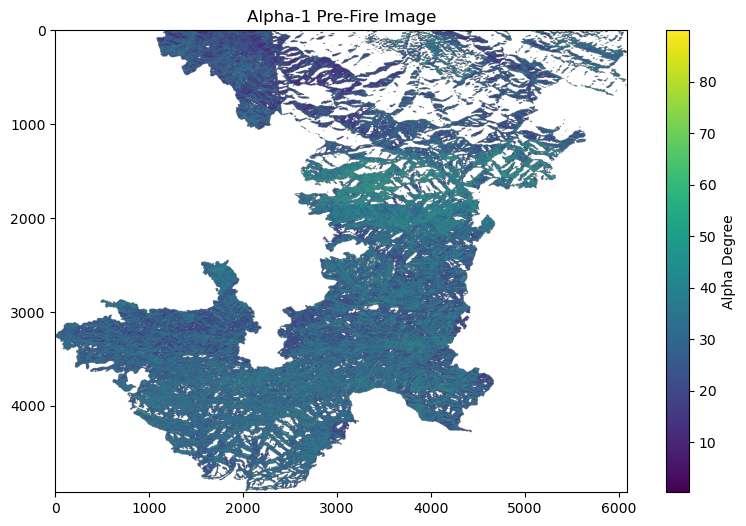

In [10]:
plt.figure(figsize=(10, 6))
plt.title("Alpha-1 Pre-Fire Image")
img = plt.imshow(alpha_pre)
plt.colorbar(img, label="Alpha Degree")

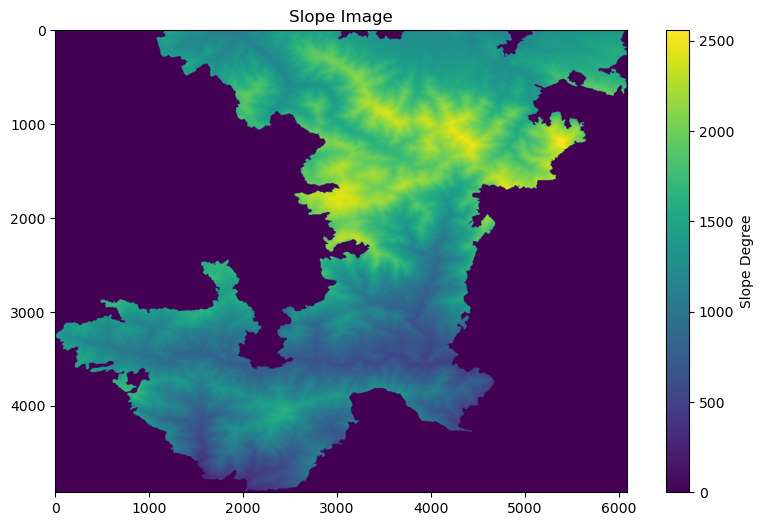

In [11]:
plt.figure(figsize=(10, 6))
plt.title("Slope Image")
img = plt.imshow(slope)
plt.colorbar(img, label="Slope Degree")